# Détection des tumeurs cérébrales avec YOLOv8

### Échantillon d’images par classe avec boîtes englobantes

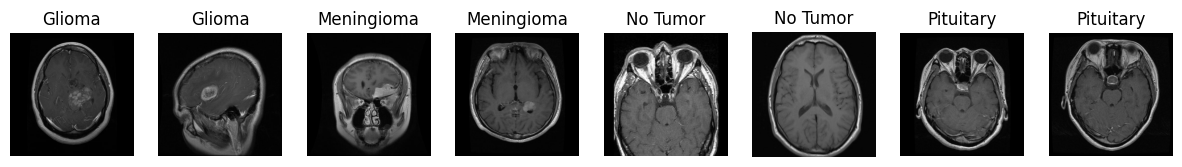

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

folder = "../../data/Data_Brain/Train/"

images = []
labels = []
for i in os.listdir(folder):
    class_path = os.path.join(folder,i)

    image_folder = os.path.join(class_path,"images") 
    label_folder = os.path.join(class_path,"")
    count = 0
    for t in os.listdir(image_folder):
        if count>1:
            break
        file_path = os.path.join(image_folder,t)
        img = cv2.imread(file_path)
        images.append(img)
        labels.append(i) 
        count+=1
        
plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')


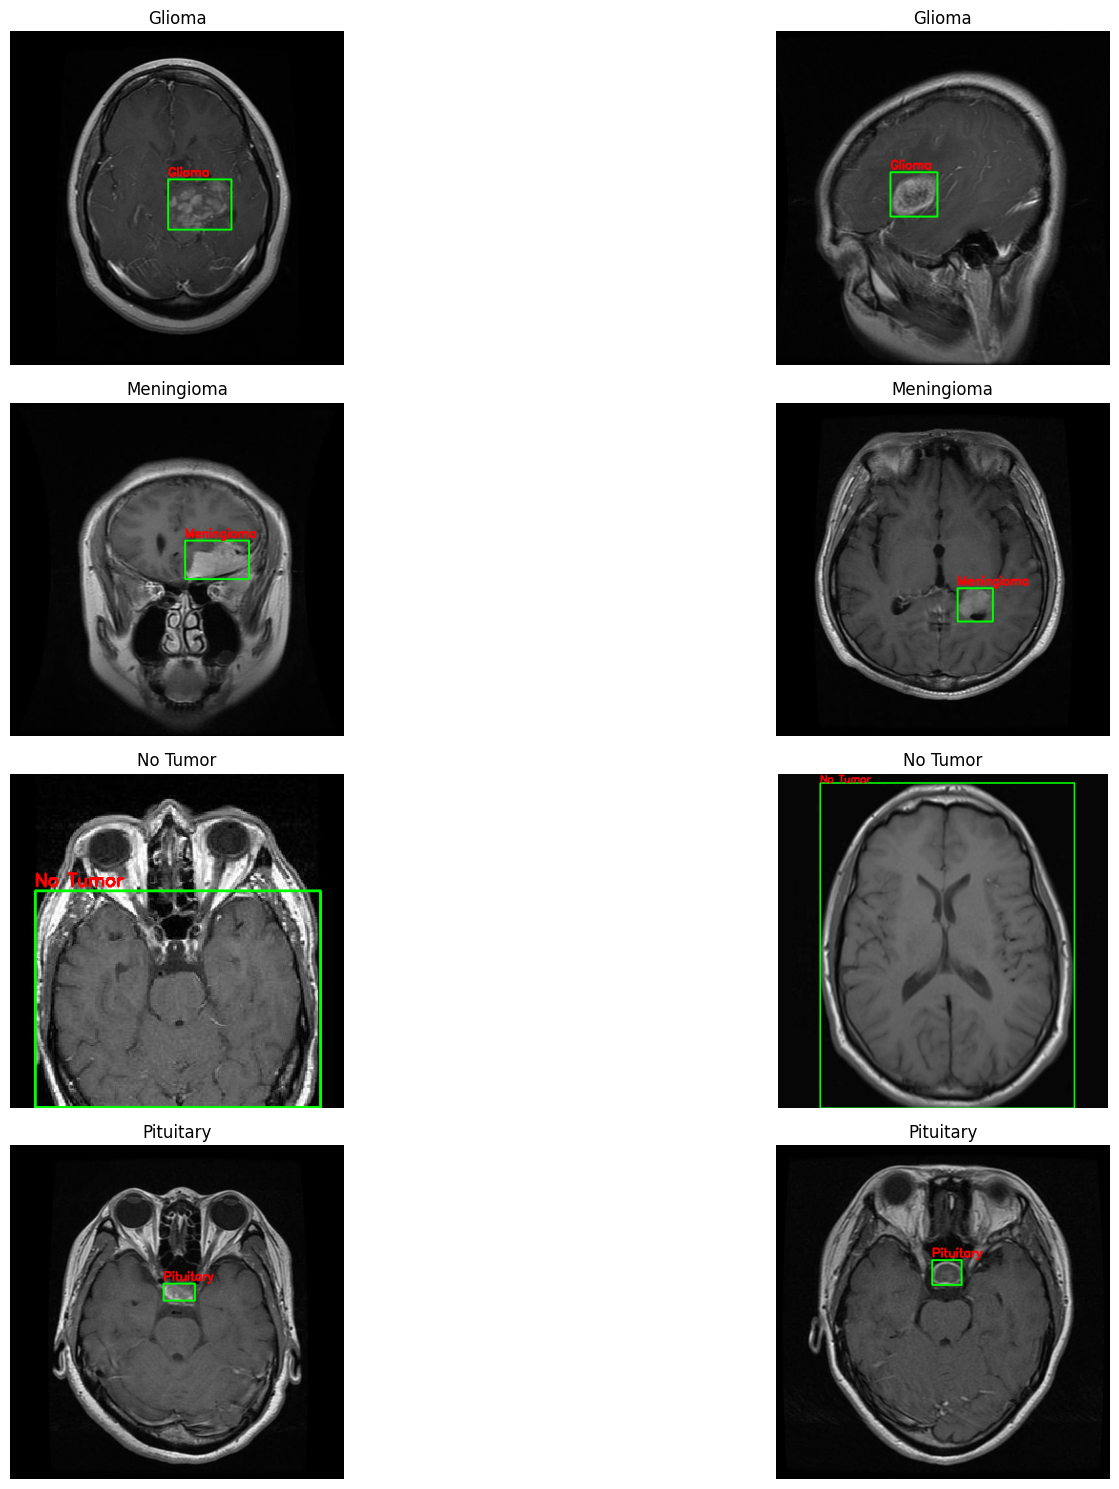

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

base_folder = "../../data/Data_Brain/Train/"

images, labels = [], []

for class_name in os.listdir(base_folder):
    image_dir = os.path.join(base_folder, class_name, "images")
    label_dir = os.path.join(base_folder, class_name, "labels")
    c = 0 

    for img_name in os.listdir(image_dir):
        if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            continue
        img_path = os.path.join(image_dir, img_name)
        label_path = os.path.join(label_dir, os.path.splitext(img_name)[0] + ".txt")
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        if os.path.exists(label_path):
            with open(label_path) as f:
                for line in f:
                    cls, xc, yc, bw, bh = map(float, line.split())
                    x1, y1 = int((xc - bw/2) * w), int((yc - bh/2) * h)
                    x2, y2 = int((xc + bw/2) * w), int((yc + bh/2) * h)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(img, class_name, (x1, max(15, y1-5)),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        images.append(img)
        labels.append(class_name)
        c += 1

        if c == 2:
            break  
plt.figure(figsize=(20, 15))
for i, img in enumerate(images):
    plt.subplot((len(images) + 1)//2, 2, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
